-7.312881977609877 9.082130376487385 -7.754947270047564 8.265490803050106


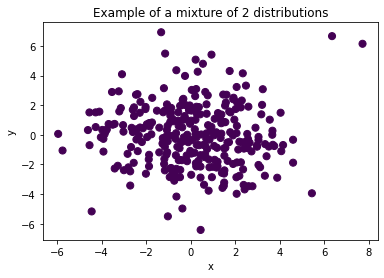

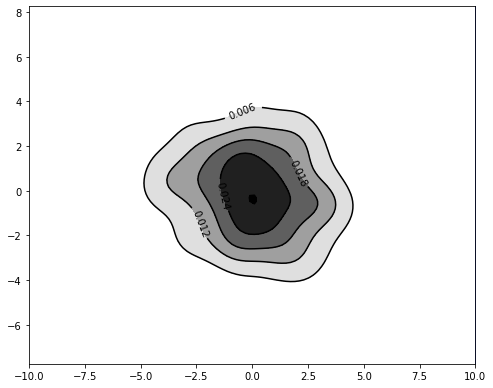

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets import make_blobs
import matplotlib
n_components = 2

centers = np.array([[0,0]])
X, truth = make_blobs(n_samples=300, centers=centers, 
                      cluster_std = [2], 
                      random_state=100)
plt.scatter(X[:, 0], X[:, 1], s=50, c = truth)
plt.title(f"Example of a mixture of {n_components} distributions")
plt.xlabel("x")
plt.ylabel("y");

# Extract x and y
x = X[:, 0]
y = X[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
xmin = -10
xmax = 10
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)


fig = plt.figure(figsize=(8,8))
ax = fig.gca()
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='binary', extend='both', locator= matplotlib.ticker.MaxNLocator(nbins=6))
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k', extend='both', locator= matplotlib.ticker.MaxNLocator(nbins=6))
ax.clabel(cset, inline=1, fontsize=10)
plt.savefig('density1.pdf')
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# plt.title('2D Gaussian Kernel density estimation')